In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_core.messages import HumanMessage,BaseMessage
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import Annotated,TypedDict

In [2]:
load_dotenv()

True

In [3]:
from langgraph.graph.message import add_messages
class chatState(TypedDict):
    messages: Annotated[list[BaseMessage],add_messages]

In [11]:
model=ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [12]:
def chatNode(state:chatState):
    messages=state['messages']

    response=model.invoke(messages)
    return {'messages':[response]}

In [13]:
graph=StateGraph(chatState)

graph.add_node('chatNode',chatNode)

graph.add_edge(START,'chatNode')
graph.add_edge('chatNode',END)

chatbot=graph.compile()

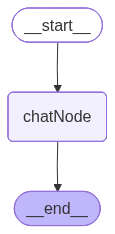

In [14]:
from IPython.display import Image
Image(chatbot.get_graph().draw_mermaid_png())

In [15]:
initial_state = {
    'messages': [HumanMessage(content='What is the capital of india')]
}

chatbot.invoke(initial_state)['messages'][-1].content

'The capital of India is **New Delhi**.'